<a href="https://colab.research.google.com/github/hadiSahin/introduction-to-machine-learning/blob/main/Final%20Project/Final_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abdulhadi Sahin



# READ DATA



In [1]:
#read the data
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/hadiSahin/introduction-to-machine-learning/main/Final%20Project/diamonds.csv')
df.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [2]:
df.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


# EXPLORE THE DATA

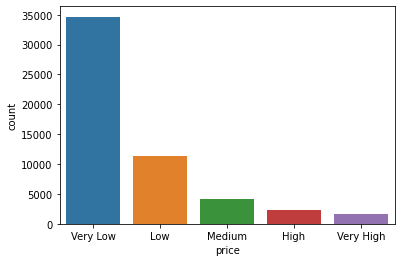

In [4]:
import seaborn as sns
#count plot
sns.countplot(x="price", data=df)

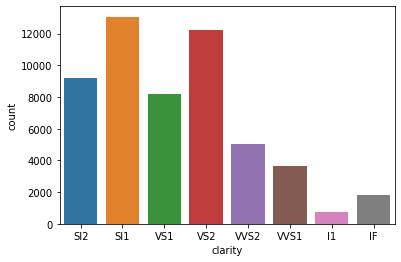

In [5]:
sns.countplot(x="clarity", data=df)

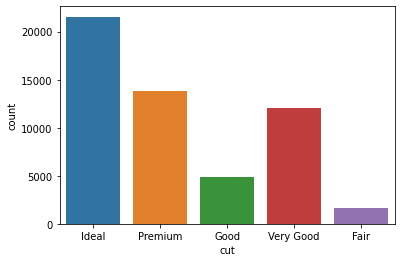

In [6]:
sns.countplot(x="cut", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


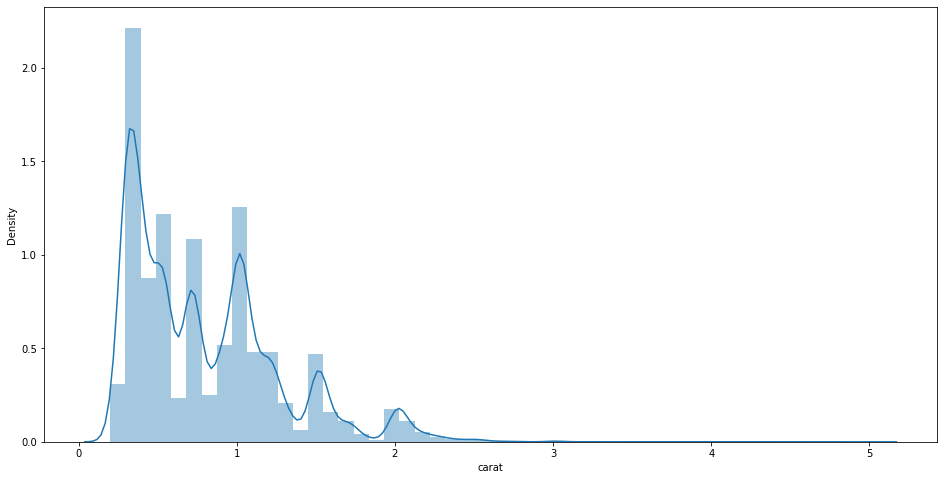

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
sns.distplot(df["carat"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


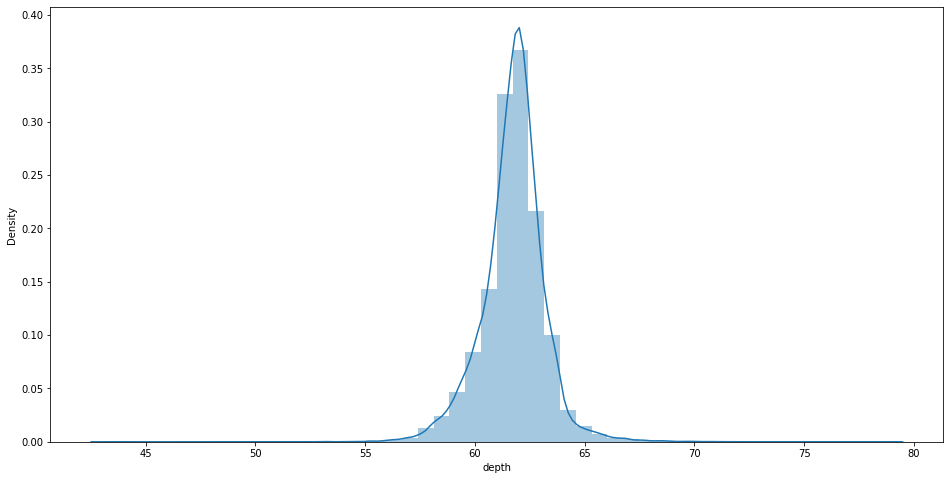

In [8]:
plt.figure(figsize=(16, 8))
sns.distplot(df["depth"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


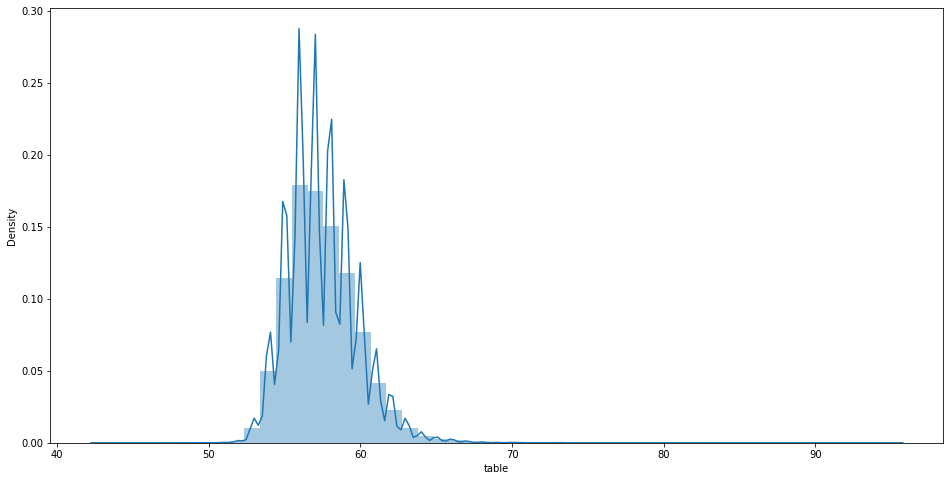

In [9]:
plt.figure(figsize=(16, 8))
sns.distplot(df["table"])

# Yorum:
verimizin unbalanced oldugunu anliyoruz. 
ayrica carat degerleri normal dagilim gostermiyor.
modelimizin fit olup olmadigini analiz ederken unbalanced bir veri oldugu icin
F1 score una bakacagim (hem recall hem de precision i dengeledigi icin)

# PREPROCESSING





In [10]:
df.duplicated().sum()


0

In [11]:
df.isnull().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
df.groupby(by="price").count()

,index,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,,
High,2308,2308,2308,2308,2308,2308,2308,2308,2308,2308
Low,11271,11271,11271,11271,11271,11271,11271,11271,11271,11271
Medium,4109,4109,4109,4109,4109,4109,4109,4109,4109,4109
Very High,1589,1589,1589,1589,1589,1589,1589,1589,1589,1589
Very Low,34663,34663,34663,34663,34663,34663,34663,34663,34663,34663


In [13]:
df.corr('pearson')
#x,y and z are highly corralated

,index,carat,depth,table,x,y,z
index,1.000000,-0.377983,-0.034800,-0.100830,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,-0.405440,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


In [14]:
# I use pca to make a single measure of x,y and z
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
xyz=pd.DataFrame(pca.fit_transform(df.iloc[:,8:10]))
df['xyz']=xyz
df.corr('pearson')

,index,carat,depth,table,x,y,z,xyz
index,1.000000,-0.377983,-0.034800,-0.100830,-0.405440,-0.395843,-0.399208,-0.400581
carat,-0.377983,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387,0.961351
depth,-0.034800,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924,0.004481
table,-0.100830,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929,0.176521
x,-0.405440,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772,0.983017
y,-0.395843,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006,0.996466
z,-0.399208,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000,0.974352
xyz,-0.400581,0.961351,0.004481,0.176521,0.983017,0.996466,0.974352,1.000000


In [15]:
#kullanmayacagim sutunlari cikartiyorum
df2=df.drop(['index','x','y','z'], axis='columns')
df2.head()

,carat,cut,color,clarity,depth,table,price,xyz
0,0.23,Ideal,E,SI2,61.5,55.0,Very Low,-2.075070
1,0.21,Premium,E,SI1,59.8,61.0,Very Low,-2.256952
2,0.23,Good,E,VS1,56.9,65.0,Very Low,-2.060091
3,0.29,Premium,I,VS2,62.4,58.0,Very Low,-1.757668
4,0.31,Good,J,SI2,63.3,58.0,Very Low,-1.592904


In [16]:
#price degiskenini sayisal hale getiriyorum
# cut , clarity ve color i dummy yapiyorum
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2["cut"] = label_encoder.fit_transform(df2["cut"]) 
df2["price"] = label_encoder.fit_transform(df2["price"]) 
df2["clarity"] = label_encoder.fit_transform(df2["clarity"]) 
df2["color"] = label_encoder.fit_transform(df2["color"]) 
df2 = pd.get_dummies(df2, columns = ['cut'])
df2 = pd.get_dummies(df2, columns = ['clarity'])
df2 = pd.get_dummies(df2, columns = ['color'])
df2.head()

,carat,depth,table,price,xyz,cut_0,cut_1,cut_2,cut_3,cut_4,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,color_0,color_1,color_2,color_3,color_4,color_5,color_6
0,0.23,61.5,55.0,4,-2.075070,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,4,-2.256952,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4,-2.060091,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,4,-1.757668,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,4,-1.592904,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [17]:
#price degerlerini karsilastirmali olarak gormek icin
display(df2["price"].value_counts())
display(df["price"].value_counts())

4    34663
1    11271
2     4109
0     2308
3     1589
Name: price, dtype: int64

Very Low     34663
Low          11271
Medium        4109
High          2308
Very High     1589
Name: price, dtype: int64

In [18]:
#carat verisi normal dagilmadigi icin minmax ile scale yaptim
from sklearn.preprocessing import minmax_scale
df2['carat'] = minmax_scale(df['carat'])
df2.head()

,carat,depth,table,price,xyz,cut_0,cut_1,cut_2,cut_3,cut_4,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,color_0,color_1,color_2,color_3,color_4,color_5,color_6
0,0.006237,61.5,55.0,4,-2.075070,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.002079,59.8,61.0,4,-2.256952,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.006237,56.9,65.0,4,-2.060091,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.018711,62.4,58.0,4,-1.757668,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0.022869,63.3,58.0,4,-1.592904,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [19]:
# create X and y
X, y = df2.loc[:, df2.columns != 'price'], df2['price']
display(X.head())
display(y.head())

,carat,depth,table,xyz,cut_0,cut_1,cut_2,cut_3,cut_4,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,color_0,color_1,color_2,color_3,color_4,color_5,color_6
0,0.006237,61.5,55.0,-2.075070,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.002079,59.8,61.0,-2.256952,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.006237,56.9,65.0,-2.060091,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.018711,62.4,58.0,-1.757668,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0.022869,63.3,58.0,-1.592904,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


0    4
1    4
2    4
3    4
4    4
Name: price, dtype: int64

In [20]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)


# ML APPLICATION

# Algorithm #1

              precision    recall  f1-score   support

           0       0.43      0.58      0.49       686
           1       0.77      0.89      0.82      3405
           2       0.64      0.34      0.45      1179
           3       0.62      0.67      0.65       485
           4       0.98      0.96      0.97     10427

    accuracy                           0.87     16182
   macro avg       0.69      0.69      0.68     16182
weighted avg       0.88      0.87      0.87     16182

Max-depth = 5
F1 Score = 0.6760026009379478


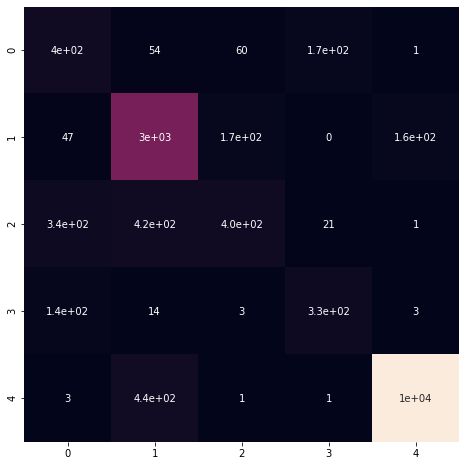

In [21]:
from sklearn.tree import DecisionTreeClassifier

#algorithm 1: gini for criterion, equal weight for each node, max depth 5
clf1 = DecisionTreeClassifier(max_depth=5, criterion='gini', class_weight=None, random_state=42)
clf1.fit(X_train,y_train)


from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred1 = clf1.predict(X_test)
print(classification_report(y_test,pred1))

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, pred1)
plt.figure(figsize=(12, 8))
ax1 =sns.heatmap(cm1, square=True, annot=True, cbar=False)

print("Max-depth = {}".format(clf1.tree_.max_depth))
print("F1 Score = {}".format(f1_score(y_test, pred1,average='macro')))






# Algorithm #2

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       686
           1       0.88      0.86      0.87      3405
           2       0.74      0.79      0.76      1179
           3       0.76      0.74      0.75       485
           4       0.97      0.98      0.97     10427

    accuracy                           0.92     16182
   macro avg       0.80      0.80      0.80     16182
weighted avg       0.92      0.92      0.92     16182

Max-depth = 31
F1 Score = 0.8025919733641788


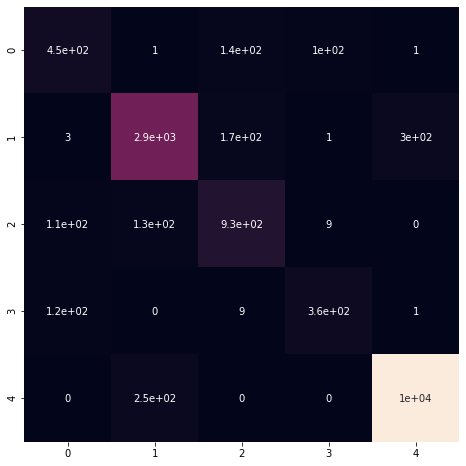

In [23]:
#algorithm 2: gini for criterion, equal weight for each node, no restriction on maximum depth
clf2 = DecisionTreeClassifier(max_depth=None, criterion='gini', class_weight=None, random_state=42)
clf2.fit(X_train,y_train)

pred2 = clf2.predict(X_test)
print(classification_report(y_test,pred2))

cm2 = confusion_matrix(y_test, pred2)
plt.figure(figsize=(12, 8))
ax2 =sns.heatmap(cm2, square=True, annot=True, cbar=False)

print("Max-depth = {}".format(clf2.tree_.max_depth))
print("F1 Score = {}".format(f1_score(y_test, pred2,average='macro')))



# Algorithm #3

              precision    recall  f1-score   support

           0       0.67      0.64      0.66       686
           1       0.89      0.86      0.87      3405
           2       0.75      0.80      0.77      1179
           3       0.75      0.73      0.74       485
           4       0.97      0.98      0.97     10427

    accuracy                           0.92     16182
   macro avg       0.80      0.80      0.80     16182
weighted avg       0.92      0.92      0.92     16182

Max-depth = 36
F1 Score = 0.8023940762749788


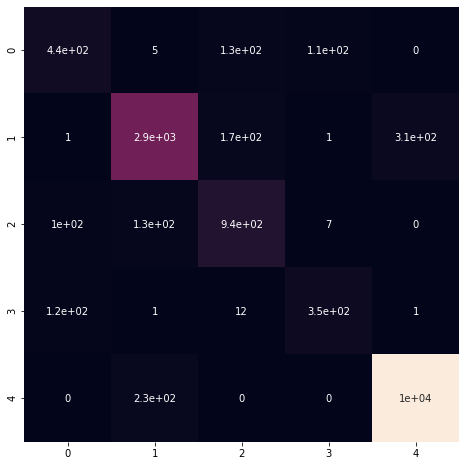

In [25]:
#algorithm 3: gini criterion, weighting based on labels, no restriction on maximum depth
clf3 = DecisionTreeClassifier(max_depth=None, criterion='gini', class_weight='balanced', random_state=42)
clf3.fit(X_train,y_train)

pred3 = clf3.predict(X_test)
print(classification_report(y_test,pred3))

cm3 = confusion_matrix(y_test, pred3)
plt.figure(figsize=(12, 8))
ax3 =sns.heatmap(cm3, square=True, annot=True, cbar=False)

print("Max-depth = {}".format(clf3.tree_.max_depth))
print("F1 Score = {}".format(f1_score(y_test, pred3,average='macro')))

# Algorithm #4

              precision    recall  f1-score   support

           0       0.67      0.64      0.66       686
           1       0.89      0.86      0.87      3405
           2       0.75      0.80      0.77      1179
           3       0.75      0.73      0.74       485
           4       0.97      0.98      0.97     10427

    accuracy                           0.92     16182
   macro avg       0.80      0.80      0.80     16182
weighted avg       0.92      0.92      0.92     16182

Max-depth = 36
F1 Score = 0.8023940762749788


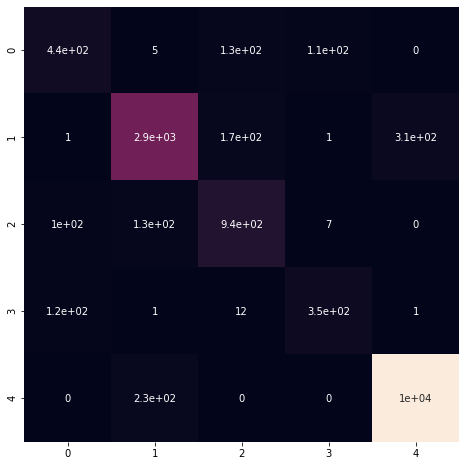

In [26]:
#algorithm 4: enthrophy criterion, weighting based on labels, no restriction on maximum depth
clf4 = DecisionTreeClassifier(max_depth=None, criterion='gini', class_weight='balanced', random_state=42)
clf4.fit(X_train,y_train)

pred4 = clf4.predict(X_test)
print(classification_report(y_test,pred4))

cm4 = confusion_matrix(y_test, pred4)
plt.figure(figsize=(12, 8))
ax4 =sns.heatmap(cm4, square=True, annot=True, cbar=False)

print("Max-depth = {}".format(clf4.tree_.max_depth))
print("F1 Score = {}".format(f1_score(y_test, pred4,average='macro')))

# OVERFITTING VS UNDERFITTING
Belki F1 score unu biraz daha yukseltmek mumkun olabilir. bunun icin x,y,z birlestirilmis degil ayri haliyle deneyecegim. yani orjinal haline tekrar donuyorum.

In [27]:
df3=df.drop(['index','xyz'], axis='columns')
df3.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [28]:
#cut,color, clarity, ve price degiskenlerini sayisal hale getiriyorum
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df3["cut"] = label_encoder.fit_transform(df3["cut"]) 
df3["price"] = label_encoder.fit_transform(df3["price"]) 
df3["clarity"] = label_encoder.fit_transform(df3["clarity"]) 
df2["color"] = label_encoder.fit_transform(df3["color"]) 
df3 = pd.get_dummies(df3, columns = ['cut'])
df3 = pd.get_dummies(df3, columns = ['clarity'])
df3 = pd.get_dummies(df3, columns = ['color'])
df3.head()

,carat,depth,table,x,y,z,price,cut_0,cut_1,cut_2,cut_3,cut_4,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,3.95,3.98,2.43,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,4.34,4.35,2.75,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [29]:
#carat is not distrbuted normally
df3['carat'] = minmax_scale(df['carat'])
df3.head()

,carat,depth,table,x,y,z,price,cut_0,cut_1,cut_2,cut_3,cut_4,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.006237,61.5,55.0,3.95,3.98,2.43,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.002079,59.8,61.0,3.89,3.84,2.31,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.006237,56.9,65.0,4.05,4.07,2.31,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.018711,62.4,58.0,4.20,4.23,2.63,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0.022869,63.3,58.0,4.34,4.35,2.75,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [30]:
X1, y1 = df3.loc[:, df3.columns != 'price'], df3['price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=17)

              precision    recall  f1-score   support

           0       0.64      0.63      0.64       686
           1       0.89      0.85      0.87      3405
           2       0.73      0.77      0.75      1179
           3       0.73      0.70      0.71       485
           4       0.97      0.98      0.97     10427

    accuracy                           0.91     16182
   macro avg       0.79      0.79      0.79     16182
weighted avg       0.91      0.91      0.91     16182

Max-depth = 34
F1 Score = 0.7890105352255763


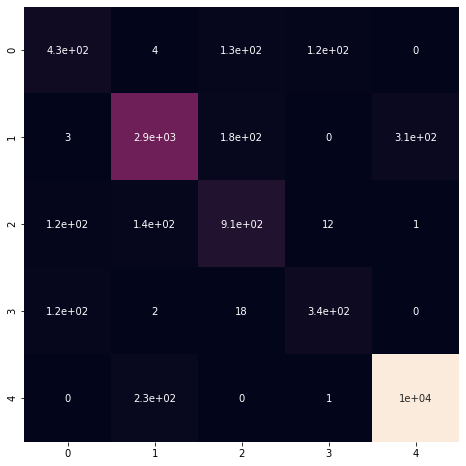

In [31]:
#en iyi sonucu verdigi icin bu logaritmayi logarithma #2 yi kullaniyorum
#algorithm 2: gini criterion, no weighting based on labels, no restriction on maximum depth
clf33 = DecisionTreeClassifier(max_depth=None, criterion='gini', class_weight=None, random_state=42)
clf33.fit(X1_train,y1_train)

pred33 = clf33.predict(X1_test)
print(classification_report(y1_test,pred33))

cm33 = confusion_matrix(y1_test, pred33)
plt.figure(figsize=(12, 8))
ax33 =sns.heatmap(cm33, square=True, annot=True, cbar=False)

print("Max-depth = {}".format(clf33.tree_.max_depth))
print("F1 Score = {}".format(f1_score(y1_test, pred33,average='macro')))

xyz birlestirilmis haliyle daha iyi sonuc vermisti. yani x,y ve  z birlestirmekle dogru yapmisiz. 





# EVALUATION


Modellerimde gini ya da entropi metodumu kullanmak bir degisiklige sebep olmadi. verinin unbalanced yapisini dikkate alip ve class_weight i degistirmek "unbalanced" yapmaka da daha iyi sonuc verdi. max depth sinirlamamak iyi sonuc verdi. bu yuzden algorithma 2 en iyi sonuca veren model oldu. yani gini criterion, class weight olmayan, ve max dept 31 bana en iyi modeli verdi. recall ve precision yaklasik %92, F1 score u %80 oldu. bu degerler cok dusuk olmamakla birlikte iyilestirilebilir. bunun icin gboost metodu kullanarak daha farkli parametreler icin deneme yapilabilir, mesela learning rate i degistirerek. 


Confusion matrix de birbirine yakin kategorilerde karisma oldugu goruluyor. bunun icin daha buyuk bir veri, ya da daha fazla feature eklemek fayda getirecektir. Ya da farkli metodlar denenebilir, multivariable logistic regression gibi.